# Introducción a las herramientas computacionales

## Tarea final del curso

Autores:
* Juan Andrés Guarín Rojas, 2201870
* Juan Diego Figueroa Hernández, 2200815
* Gabriela Sánchez Ariza, 2200816

***Introducción***: La librería *Pandas* de Python tiene una gran variedad de aplicaciones en la ciencia de datos, ya que ofrece unas estructuras muy poderosas y flexibles que facilitan la manipulación y el tratamiento de datos. Teniendo en cuenta lo anterior, se presenta un trabajo de programación en el que se realizó el análisis de cuatro diferentes conjuntos de datos, que contienen mediciones recogidas en una casa situada en Sceaux entre los meses de enero y diciembre del año 2010, a través de esta y otras librerías como se verán a lo largo de este trabajo.

Para la presentación de este trabajo se realizó la división del código en tres secciones que corresponden a: 

* [1. Lectura de datos](#section-1)
* [2. Remuestreo de los datos](#section-2)
* [3. Regresión de los datos](#section-3)
* [4. Conclusiones](#section-4)

In [2]:
#Importanción de librerias importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib as mpl

## 1. Lectura de datos <a class="anchor" id="section-1"></a>

### Lectura de datos individuales

Las medidas de potencia reactiva y activa se encuentran en [*kW.min*], la intensidad en [*kA*] y el voltaje en [*V*]. 

In [3]:
#A continuación, se leen los datos en DataFrames.
data1 = pd.read_csv('Global_reactive_power.csv')
data2 = pd.read_csv('Global_active_power.csv')
data3 = pd.read_csv('Global_intensity.csv')
data4 = pd.read_csv('Voltage.csv')

In [4]:
data1

,Datetime,Global_reactive_power
0,2010-01-01 00:00:00,0.236
1,2010-01-01 00:01:00,0.234
2,2010-01-01 00:02:00,0.234
3,2010-01-01 00:03:00,0.186
4,2010-01-01 00:04:00,0.102
...,...,...
457390,2010-11-26 20:58:00,0.000
457391,2010-11-26 20:59:00,0.000
457392,2010-11-26 21:00:00,0.000
457393,2010-11-26 21:01:00,0.000


### Lectura de los datos en conjunto

A continuación, se muestra información de las cuatro columnas “Global active power”, “Global reactive power”, “Global intensity” y “Voltage”, con la correspondiente columna de “Datetime” en minutos. 

`pd.merge` mezcla las bases de datos manteniendo la columna de Datetime sin duplicar, la cual es la misma para todas.
Se mezclan las bases de datos de dos a dos.

In [5]:
data = pd.merge(data1, data2, on=['Datetime'])
data = pd.merge(data, data3, on=['Datetime'])
data = pd.merge(data,data4, on=['Datetime'])

In [6]:
data

,Datetime,Global_reactive_power,Global_active_power,Global_intensity,Voltage
0,2010-01-01 00:00:00,0.236,1.790,7.4,240.65
1,2010-01-01 00:01:00,0.234,1.780,7.4,240.07
2,2010-01-01 00:02:00,0.234,1.780,7.4,240.15
3,2010-01-01 00:03:00,0.186,1.746,7.2,240.26
4,2010-01-01 00:04:00,0.102,1.686,7.0,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.000,0.946,4.0,240.43
457391,2010-11-26 20:59:00,0.000,0.944,4.0,240.00
457392,2010-11-26 21:00:00,0.000,0.938,3.8,239.82
457393,2010-11-26 21:01:00,0.000,0.934,3.8,239.70


## 2. Remuestreo de los datos <a class="anchor" id="section-2"></a>

In [7]:
#Se convierten las fechas de la columna "Datetime" a formato de datetime. Las medidas están tomadas por cada minuto. 
#Después, se pone la columna "Datetime" como índice de la tabla.

data['Datetime'] = pd.to_datetime(data['Datetime'])
data = data.set_index('Datetime')

In [8]:
data

,Global_reactive_power,Global_active_power,Global_intensity,Voltage
Datetime,,,,
2010-01-01 00:00:00,0.236,1.790,7.4,240.65
2010-01-01 00:01:00,0.234,1.780,7.4,240.07
2010-01-01 00:02:00,0.234,1.780,7.4,240.15
2010-01-01 00:03:00,0.186,1.746,7.2,240.26
2010-01-01 00:04:00,0.102,1.686,7.0,240.12
...,...,...,...,...
2010-11-26 20:58:00,0.000,0.946,4.0,240.43
2010-11-26 20:59:00,0.000,0.944,4.0,240.00
2010-11-26 21:00:00,0.000,0.938,3.8,239.82


In [9]:
#Remuestreo de los datos en escala de días por medio del promedio diario.

data_day = data.resample('D').mean()
data_day = data_day.dropna()

data_day

,Global_reactive_power,Global_active_power,Global_intensity,Voltage
Datetime,,,,
2010-01-01,0.114817,0.850175,3.537083,242.565722
2010-01-02,0.086656,1.176235,4.857778,243.631743
2010-01-03,0.090331,0.901894,3.757778,241.822778
2010-01-04,0.100322,1.171833,4.879028,241.754160
2010-01-05,0.133697,0.916776,3.929861,240.647167
...,...,...,...,...
2010-12-07,0.198550,0.770538,3.397222,240.218646
2010-12-08,0.117429,0.367846,1.623750,240.794931
2010-12-09,0.139832,1.119508,4.755694,241.619722


In [10]:
#Remuestreo de los datos en escala de meses por medio del promedio mensual.

data_month = data.resample('M').mean()
data_month = data_month.dropna()

data_month

,Global_reactive_power,Global_active_power,Global_intensity,Voltage
Datetime,,,,
2010-01-31,0.125182,1.300640,5.430332,242.338522
2010-02-28,0.109467,1.157539,4.836624,242.002101
2010-03-31,0.136368,1.170015,4.920399,241.475284
2010-04-30,0.129557,1.036334,4.363496,241.442527
2010-05-31,0.127221,1.075957,4.551504,241.296151
2010-06-30,0.145525,0.975306,4.170282,240.888985
2010-07-31,0.138093,0.778947,3.337202,240.965167
2010-08-31,0.130815,0.929452,3.954423,241.422944
2010-09-30,0.127700,0.997541,4.223837,241.267517


## 3. Regresión de los datos <a class="anchor" id="section-3"></a>

#### Se declaran las funciones de ajuste para las relaciones 1, 2 y 3, que se mencionaran más adelante


In [11]:
#x es el vector de entrada. A y B son los parámetros de ajuste. 
def funcstraight(x, A, B):
    z = A * x + B
    return z

#X contiene los dos vectores de entrada. A1, A2 y B son los parámetros de ajuste.
def funcplane(X, A1, A2, B):
    x,y=X
    z = A1 * x + A2 * y + B 
    return z

#### Se declaran las funciones que hallan los parámetros para el ajuste

In [12]:
#Se usa para los ajustes a líneas rectas.
def paramstraight(x,y):
    #x y y son vectores con los datos de la variable independiente y dependiente, respectivamente.
    
    #Se usa curve_fit para encontrar los parámetros.
    params, cov = curve_fit(funcstraight, x, y)
    
    #Se muestra en pantalla los coeficientes de la función y sus correspondientes valores sigma.
    print("Coeficients are : {}".format(params))
    print("Sigma coeficients : {}".format(np.sqrt(np.diag(cov))))
    
    #Se calcula el error de raíz de mínimos cuadrados (RMSE, por sus siglas en inglés).
    E=np.sqrt(np.mean((y-funcstraight(x, *params))**2))
    print("Error on fit is : {}".format(E))
    return params, cov


#Se usa para los ajustes a planos.
def paramsplane(X,y):
    #X es una matriz con los dos vectores de la variable independiente. 
    #y es un vector con los datos de la variable dependiente.
    
    #Se usa curve_fit para encontrar los parámetros.
    params, cov = curve_fit(funcplane, X, y)
    
    #Se muestra en pantalla los coeficientes de la función y sus correspondientes valores sigma.
    print("Coeficients are : {}".format(params))
    print("Sigma coeficients : {}".format(np.sqrt(np.diag(cov))))
    
    #Se calcula el error de raíz de mínimos cuadrados (RMSE, por sus siglas en inglés).
    E=np.sqrt(np.mean((y-funcplane(X, *params))**2))
    print("Error on fit is : {}".format(E))
    return params, cov

#### Funciones para crear gráficas
A continuación, se declaran funciones para automatizar la creación de gráficas que se harán más adelante.

In [13]:
def graficar(xdata,ydata,xdata2,ydata2,label1,label2, title, xlabel, ylabel,loc=2):
    #xdata y ydata son los datos del ajuste. xdata2 y ydata2 son los datos experimentales.
    
    #Se hace la gráfica del ajuste y los datos experimentales.
    plt.figure(figsize=(10,5.5))
    plt.plot(xdata, ydata, 'r-',label=label1)
    plt.scatter(xdata2,ydata2,label=label2)
    plt.legend(fontsize = 15, loc=loc)
    plt.grid(True)
    plt.title(title, fontsize = 18)
    plt.ylabel(ylabel, fontsize = 15)
    plt.xlabel(xlabel, fontsize = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show()
    
    
def graficar3d(xdata,ydata,zdata,params):
    #xdata, ydata y zdata son los datos experimentales. Params son los coeficientes del ajuste.
    
    #Se crean los datos para graficar la superficie del plano, tomando en cuenta el valor máximo y mínimo de x y y,
    #y los parámetros de ajuste.
    x=np.linspace(xdata.min()-1, xdata.max()+1, 100)
    y=np.linspace(ydata.min()-4, ydata.max()+4, 100)
    xx, yy = np.meshgrid(x,y)
    z = params[0]*xx + params[1]*yy + params[2]
    
    #Se hace la gráfica de los datos experimentales y del plano.
    plt.figure(figsize=(10,6))
    ax = plt.axes(projection='3d')
    scatter = ax.scatter3D(xdata,ydata,zdata, cmap='Greens')
    ax.plot_surface(xx, yy, z, alpha=0.5)
    ax.set_xlabel('Global_intensity')
    ax.set_ylabel('Voltage')
    ax.set_zlabel('Global_active_power')
    ax.set_title('Fit of the global active power')
    
    #Se crea la leyenda para la superficie dibujando una falsa línea de longitud cero. Al final se pone sobre el gráfico.
    fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='b', marker = 'o')
    ax.legend([fake2Dline, scatter], [' Plane fit', 'Data'], numpoints = 1)


### Relación 1: Global intensity vs global active power

Coeficients are : [ 0.2380262  -0.00498205]
Sigma coeficients : [1.86059228e-05 1.10667215e-04]
Error on fit is : 0.04925499323758776


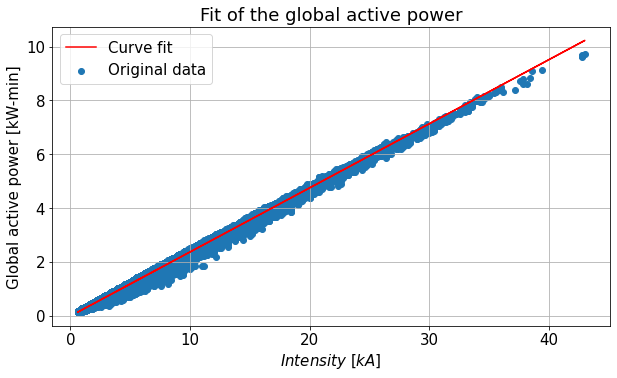

In [14]:
#Regresión de los datos obtenidos del dataset de minutos.
params11,cov11=paramstraight(data["Global_intensity"],data["Global_active_power"])
graficar(data["Global_intensity"], funcstraight(data["Global_intensity"], *params11),
          data["Global_intensity"],data["Global_active_power"],label1='Curve fit',
         label2='Original data', title='Fit of the global active power',
         xlabel='$Intensity$ $[kA]$',ylabel='Global active power [kW-min]')

Coeficients are : [ 0.24305793 -0.02753221]
Sigma coeficients : [0.00060044 0.00282233]
Error on fit is : 0.015224732467354772


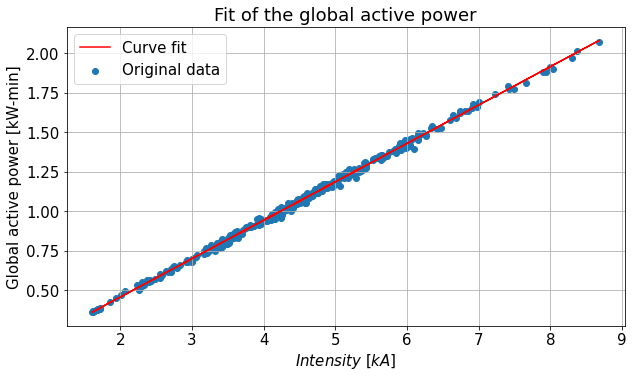

In [15]:
#Regresión de los datos obtenidos del dataset de días.
params12,cov12=paramstraight(data_day["Global_intensity"],data_day["Global_active_power"])
graficar(data_day["Global_intensity"], funcstraight(data_day["Global_intensity"], *params12),
          data_day["Global_intensity"],data_day["Global_active_power"],label1='Curve fit',
         label2='Original data', title='Fit of the global active power',
         xlabel='$Intensity$ $[kA]$',ylabel='Global active power [kW-min]')

Coeficients are : [ 0.25042854 -0.06067194]
Sigma coeficients : [0.0025558  0.01154817]
Error on fit is : 0.0041255838750152065


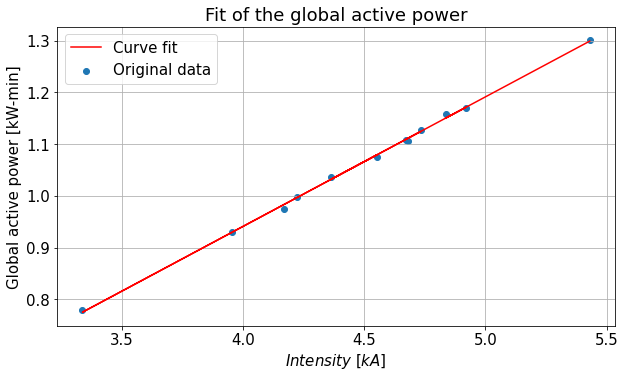

In [16]:
#Regresión de los datos obtenidos del dataset de meses.
params13,cov13=paramstraight(data_month["Global_intensity"],data_month["Global_active_power"])
graficar(data_month["Global_intensity"], funcstraight(data_month["Global_intensity"], *params13),
          data_month["Global_intensity"],data_month["Global_active_power"],label1='Curve fit',
         label2='Original data', title='Fit of the global active power',
         xlabel='$Intensity$ $[kA]$',ylabel='Global active power [kW-min]')

### Relación 2: Voltage vs global active power

Coeficients are : [-0.13586092 33.87352423]
Sigma coeficients : [0.00044018 0.10631733]
Error on fit is : 0.8487935137294336


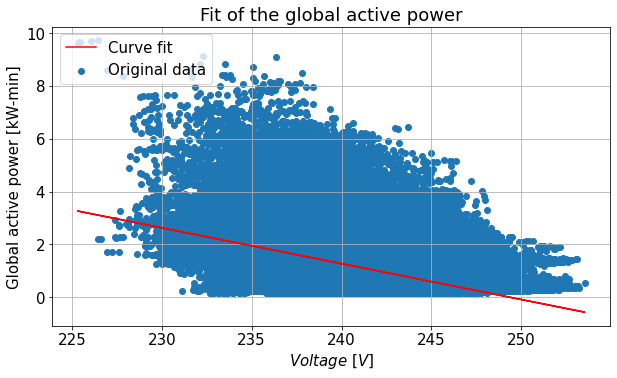

In [17]:
#Regresión de los datos obtenidos del dataset de minutos.
params21,cov21=paramstraight(data["Voltage"],data["Global_active_power"])
graficar(data["Voltage"], funcstraight(data["Voltage"], *params21),
          data["Voltage"],data["Global_active_power"],label1='Curve fit',
         label2='Original data', title='Fit of the global active power',
         xlabel='$Voltage$ $[V]$',ylabel='Global active power [kW-min]')

Coeficients are : [ 0.02966029 -6.10166765]
Sigma coeficients : [0.01237697 2.98936826]
Error on fit is : 0.34128269795840094


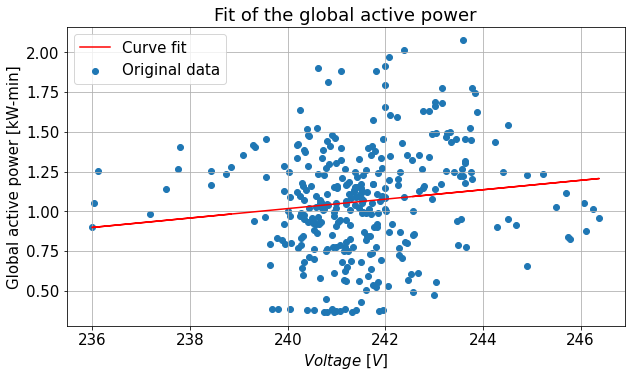

In [18]:
#Regresión de los datos obtenidos del dataset de días.
params22,cov22=paramstraight(data_day["Voltage"],data_day["Global_active_power"])
graficar(data_day["Voltage"], funcstraight(data_day["Voltage"], *params22),
          data_day["Voltage"],data_day["Global_active_power"],label1='Curve fit',
         label2='Original data', title='Fit of the global active power',
         xlabel='$Voltage$ $[V]$',ylabel='Global active power [kW-min]')

Coeficients are : [  0.17281047 -40.67096749]
Sigma coeficients : [ 0.05994998 14.47824917]
Error on fit is : 0.09452198916915232


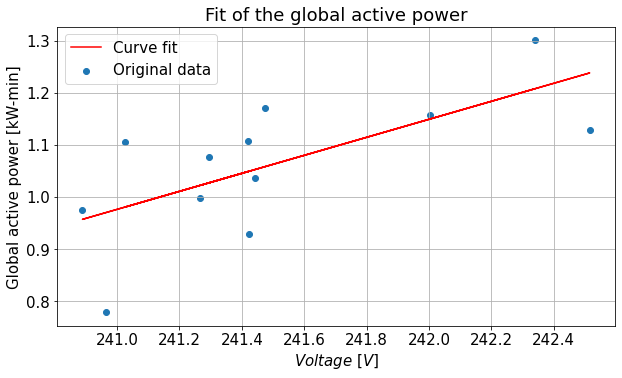

In [19]:
#Regresión de los datos obtenidos del dataset de meses.
params23,cov23=paramstraight(data_month["Voltage"],data_month["Global_active_power"])
graficar(data_month["Voltage"], funcstraight(data_month["Voltage"], *params23),
          data_month["Voltage"],data_month["Global_active_power"],label1='Curve fit',
         label2='Original data', title='Fit of the global active power',
         xlabel='$Voltage$ $[V]$',ylabel='Global active power [kW-min]')

### Relacion 3: Global intensity vs voltage vs global active power

Coeficients are : [ 0.23947996  0.00466923 -1.13918528]
Sigma coeficients : [1.99569088e-05 2.73980305e-05 6.65611741e-03]
Error on fit is : 0.04776192256518138


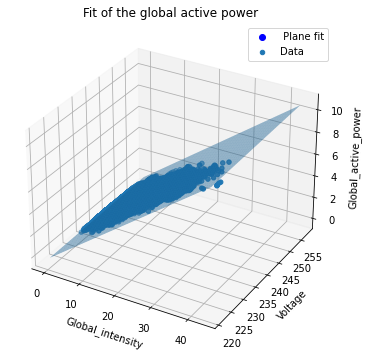

In [20]:
#Regresión de los datos obtenidos del dataset de minutos
params31,cov31=paramsplane([data["Global_intensity"],data["Voltage"]],data["Global_active_power"])
graficar3d(data['Global_intensity'],data['Voltage'],data['Global_active_power'],params31)

Coeficients are : [ 0.24235044  0.00617298 -1.51527135]
Sigma coeficients : [0.00047422 0.00043608 0.10512233]
Error on fit is : 0.01193888807150323


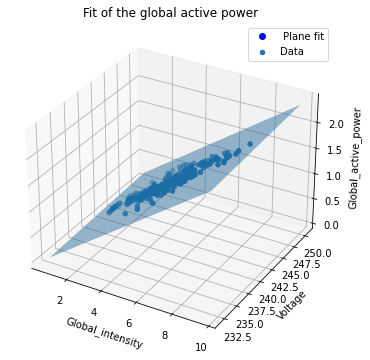

In [21]:
#Regresión de los datos obtenidos del dataset de días
params32,cov32=paramsplane([data_day["Global_intensity"],data_day["Voltage"]],data_day["Global_active_power"])
graficar3d(data_day['Global_intensity'],data_day['Voltage'],data_day['Global_active_power'],params32)

Coeficients are : [ 0.24524991  0.00808133 -1.98910299]
Sigma coeficients : [0.00241239 0.0024698  0.58942087]
Error on fit is : 0.002788071357096292


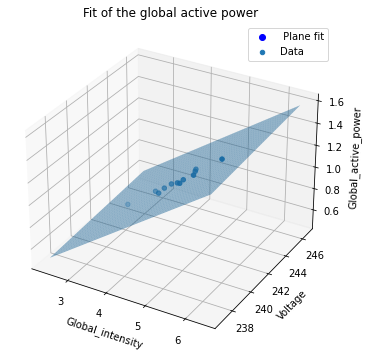

In [22]:
#Regresión de los datos obtenidos del dataset de meses
params33,cov33=paramsplane([data_month["Global_intensity"],data_month["Voltage"]],data_month["Global_active_power"])
graficar3d(data_month['Global_intensity'],data_month['Voltage'],data_month['Global_active_power'],params33)

## 4. Conclusiones <a class="anchor" id="section-4"></a>

* Con base en el error calculado al realizar el ajuste de datos con las tres relaciones bajo una misma medida temporal (*minutos*), se aprecia que la mejor relación es la número tres, puesto que tiene el error mínimo al compararlas entre ellas mismas.
* Para una misma relación pero bajo medidas temporales distintas se aprecia que el error de ajuste disminuye. Esto se debe a que al haber menos puntos el ajuste de los datos debe ser mejor, ya que, van a haber menos datos dispersos. Sin embargo, este ajuste pasa a ser menos representativo, pues se reduce drásticamente la cantidad de datos. 
* La relación dos resultó ser la peor, pues incluso con medidas temporales distintas la tendencia del ajuste de potencia vs voltaje pasaba a ser creciente, con el dataset de minutos, y decreciente, con el dataset de días y meses.
* La relación tres tenia datos más concentrados en una región de los datos originales, puesto que al gráficar los datos promedio para días y meses se vió que el valor máximo de intensidad disminuye y el valor minimo de voltaje aumenta. 


# <center>Fin</center>
